<a href="https://colab.research.google.com/github/tocom242242/aifx_blog_codes/blob/master/simple_binary_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

[【超入門、ニューラルネットワーク】Kerasで２値分類　〜超簡単な例〜](https://www.tcom242242.net/entry/ai-2/deeplearning/%e3%80%90%e8%b6%85%e5%85%a5%e9%96%80%e3%80%81%e3%83%8b%e3%83%a5%e3%83%bc%e3%83%a9%e3%83%ab%e3%83%8d%e3%83%83%e3%83%88%e3%83%af%e3%83%bc%e3%82%af%e3%80%91keras%e3%81%a7%ef%bc%92%e5%80%a4%e5%88%86/)

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import Dense, Activation
from sklearn.model_selection import train_test_split
from keras.utils import np_utils

In [2]:
NB_DATAS = 500

# データの作成
X = np.random.rand(NB_DATAS, 2) # 入力データ
Y = np.zeros(NB_DATAS)          # ラベルデータ

In [3]:
def f(x):
    return x**2

# ラベルの付与
for idx, x in enumerate(X):
    if x[1] > f(x[0]):
        Y[idx] = 1.0

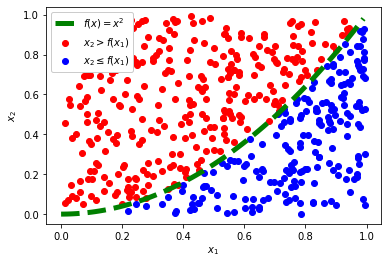

In [4]:
X1 = np.array([[x1, x2] for x1, x2 in zip(X[:, 0], X[:, 1]) if x2 > f(x1)])
X2 = np.array([[x1, x2] for x1, x2 in zip(X[:, 0], X[:, 1]) if x2 <= f(x1)])
plt.scatter(X1[:, 0], X1[:, 1], c="r", label="$x_2>f(x_1)$")
plt.scatter(X2[:, 0], X2[:, 1], c="b", label="$x_2 \leq f(x_1)$")

x2 = np.arange(0, 1, 0.01)
y2 = x2**2
plt.plot(x2, y2, c="g", linewidth=5.0, linestyle="--", label="$f(x)=x^2$")
plt.legend(loc="upper left", framealpha=1.0)
plt.xlabel("$x_1$")
plt.ylabel("$x_2$")
plt.show()

In [5]:
# one-hotエンコード.例) 1 => [0, 1]
Y_one_hot = np_utils.to_categorical(Y)

In [8]:
print(f"y:{Y[0]},y_one_hot:{Y_one_hot[0]}")

y:0.0,y_one_hot:[1. 0.]


In [9]:
# 教師データとテストデータに分割
x_train, x_test, y_train, y_test= train_test_split(X, Y_one_hot, train_size=0.8)

In [10]:
# モデルの作成
model = Sequential()
model.add(Dense(3, input_dim=2))    # 入力層2ノード, 隠れ層に3ノード, 全結合
model.add(Activation("sigmoid"))    # 活性化関数はsigmoid
model.add(Dense(2)) # 出力層2ノード,全結合
model.add(Activation("sigmoid"))

In [11]:
model.compile(loss="binary_crossentropy",   # 誤差関数
              optimizer="adam",     # 最適化手法
              metrics=['accuracy'])

In [16]:
# 訓練
history = model.fit(x_train, y_train, epochs=200, batch_size=32) # 学習


Epoch 1/200
13/13 [==============================] - 0s 1ms/step - loss: 0.4252 - accuracy: 0.9025
Epoch 2/200
13/13 [==============================] - 0s 1ms/step - loss: 0.4236 - accuracy: 0.9050
Epoch 3/200
13/13 [==============================] - 0s 1ms/step - loss: 0.4220 - accuracy: 0.9050
Epoch 4/200
13/13 [==============================] - 0s 1ms/step - loss: 0.4204 - accuracy: 0.9100
Epoch 5/200
13/13 [==============================] - 0s 1ms/step - loss: 0.4186 - accuracy: 0.9100
Epoch 6/200
13/13 [==============================] - 0s 1ms/step - loss: 0.4169 - accuracy: 0.9100
Epoch 7/200
13/13 [==============================] - 0s 1ms/step - loss: 0.4153 - accuracy: 0.9100
Epoch 8/200
13/13 [==============================] - 0s 1ms/step - loss: 0.4137 - accuracy: 0.9125
Epoch 9/200
13/13 [==============================] - 0s 1ms/step - loss: 0.4121 - accuracy: 0.9125
Epoch 10/200
13/13 [==============================] - 0s 1ms/step - loss: 0.4104 - accuracy: 0.9150
Epoch 11/

dict_keys(['loss', 'accuracy'])

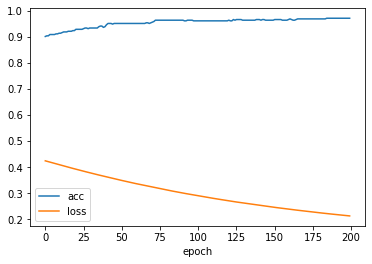

In [21]:
plt.plot(history.epoch, history.history["accuracy"], label="acc")
plt.plot(history.epoch, history.history["loss"], label="loss")
plt.xlabel("epoch")
plt.legend()

In [22]:
# 評価
score = model.evaluate(x_test, y_test, verbose=1)

print("Test score", score[0])
print("Test accuracy", score[1])

4/4 [==============================] - 0s 2ms/step - loss: 0.1973 - accuracy: 0.9700
Test score 0.1972905993461609
Test accuracy 0.9700000286102295
